In [34]:
import requests
import io
import pandas as pd
from dateutil import parser, rrule
from datetime import datetime, time, date
import time

def getRainfallData(station, day, month, year):
    """
    Function to return a data frame of minute-level weather data for a single Wunderground PWS station.
    
    Args:
        station (string): Station code from the Wunderground website
        day (int): Day of month for which data is requested
        month (int): Month for which data is requested
        year (int): Year for which data is requested
    
    Returns:
        Pandas Dataframe with weather data for specified station and date.
    """
    url = "http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={station}&day={day}&month={month}&year={year}&graphspan=day&format=1"
    full_url = url.format(station=station, day=day, month=month, year=year)
    # print full_url
    # Request data from wunderground data
    response = requests.get(full_url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
    data = response.text
    data = data.replace('<br>', '')
    dataframe = pd.read_csv(io.StringIO(data), index_col=False)
    dataframe['station'] = station
    return dataframe
    
# Generate a list of all of the dates we want data for
start_date = "2017-01-01"
end_date   = "2017-03-12"
start = parser.parse(start_date)
end = parser.parse(end_date)
dates = list(rrule.rrule(rrule.DAILY, dtstart=start, until=end))

# Create a list of stations here to download data for
stations = [
    'IUPPERAU8'
]
# Parkweg (IOBERPUC5)	9.3°
# Grossambergstrasse (IOBERSTE149)	9.7°
# Linz (ILINZ66)	9.2°
# Volksgartenviertel (ILINZ27)	9.8°
# Windflach-Poestlingberg (IOBERSTE107)	10.2°
# R merberg-Margarethen (ILINZ19)	9.4°
# R merberg-Margarethen (ILINZ69)	9.1°
# Linz (ILINZ74)	3.3°
# Altstadtviertel (ILINZ93)	8.5°
# Altstadtviertel (ILINZ4)	18.5°
# Reisingerweg (ILINZ2)	12.2°
# Volksgartenviertel (ILINZ12)	9.1°
# Makartviertel (ILINZ9)	15.4°
# P stlingberg (ILINZ138)	18.5°
# Volksgartenviertel (ILINZ49)	11.3°
# Volksgartenviertel (ILINZ25)	17°
# Linz (I4LINZ2)	9.5°
# Linz (I4POSTLI2)	12°
# Linz (I4LINZST2)	6.9°
# Linz (I4LINZ4)	14°
# P stlingberg (ILINZ10)	15.8°
# Hauptplatz 17 (IOBERSTE120)	10.5°
# Landstra e (ILINZ43)	9.6°
# Auberg (ILINZ102)	12.7°
# Auberg (ILINZ89)	7.5°
# Rathausviertel (ILINZ55)	7.6°
# Franckviertel (ILINZ47)	9.5°
# Rathausviertel (ILINZ112)	6.3°
# Rathausviertel (ILINZ35)	6.5°
# P stlingberg (ILINZ95)	9.1°
# Linz (ILINZ148)	8.5°
# Linz (ILINZ48)	9.4°
# Linz (ILINZ46)	10.5°
# Bahnhofstra e (ILINZ61)	11.4°
# Linz (I4BACHLB2)	8.7°
# Hafenviertel (ILINZ37)	9.2°
# Linz (ISTEYREG4)	9.2°
# Hafenviertel (ILINZ65)	7.2°
# Koglerau (IOBERSTE132)	5.7°
# Hangweg (IGROAMBE2)	5.3°
# Linz (I4BACHLB3)	10.3°
# Bachl-Gr ndberg (ILINZ67)	13.1°
# Sankt Magdalena (ILINZ53)	9.2°
# St. Magdalena (IUPPERAU8)	12.4°
# Linz (ILINZ78)	10.1°
# Sankt Magdalena (ILINZ14)	7.8°
# Linz (ILINZ146)	9.1°
# Sankt Magdalena (ILINZ63)	8.6°
# Linz (ILINZ64)	8°
# Sankt Magdalena (ILINZ133)	10.7°
# Katzbach (ILINZ31)	19.3°
# Linz (I4MADERL2)	12.1°
# Muehlberg (IOBERSTE100)	7.8°
# forest (IOBERSTE83)	9.7°
# Steyregg (I4PLESCH2)	5.9°
# Kaiserberg (ILICHTEN96)	5.6°
# Steyregg (I4AUSSER2)	6.3°
# Wimmergasse (IOBERBAI2)
# ]
# # Set a backoff time in seconds if a request fails
backoff_time = 10
data = {}

# Gather data for each station in turn and save to CSV.
for station in stations:
    print("Working on {}".format(station))
    data[station] = []
    for date in dates:
        # Print period status update messages
        if date.day % 10 == 0:
            print("Working on date: {} for station {}".format(date, station))
        done = False
        while done == False:
            try:
                weather_data = getRainfallData(station, date.day, date.month, date.year)
                done = True
            except ConnectionError as e:
                # May get rate limited by Wunderground.com, backoff if so.
                print("Got connection error on {}".format(date))
                print("Will retry in {} seconds".format(backoff_time))
                time.sleep(10)
        # Add each processed date to the overall data
        data[station].append(weather_data)
    # Finally combine all of the individual days and output to CSV for analysis.
    pd.concat(data[station]).to_csv("{}_weather.csv".format(station))

Working on ILEONDIN11
Working on date: 2017-01-10 00:00:00 for station ILEONDIN11
Working on date: 2017-01-20 00:00:00 for station ILEONDIN11
Working on date: 2017-01-30 00:00:00 for station ILEONDIN11
Working on date: 2017-02-10 00:00:00 for station ILEONDIN11
Working on date: 2017-02-20 00:00:00 for station ILEONDIN11
Working on date: 2017-03-10 00:00:00 for station ILEONDIN11
Working on IOBERPUC6
Working on date: 2017-01-10 00:00:00 for station IOBERPUC6
Working on date: 2017-01-20 00:00:00 for station IOBERPUC6
Working on date: 2017-01-30 00:00:00 for station IOBERPUC6
Working on date: 2017-02-10 00:00:00 for station IOBERPUC6
Working on date: 2017-02-20 00:00:00 for station IOBERPUC6
Working on date: 2017-03-10 00:00:00 for station IOBERPUC6
Working on ILEONDIN15
Working on date: 2017-01-10 00:00:00 for station ILEONDIN15
Working on date: 2017-01-20 00:00:00 for station ILEONDIN15
Working on date: 2017-01-30 00:00:00 for station ILEONDIN15
Working on date: 2017-02-10 00:00:00 for 

In [6]:
len(data['I4BACHLB2'])

71

In [12]:
result = pd.concat(data['I4BACHLB2'],ignore_index=True)

In [15]:
result.head()

,Time,TemperatureC,DewpointC,PressurehPa,WindDirection,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,Conditions,Clouds,dailyrainMM,SoftwareType,DateUTC,station
0,2017-01-01 00:06:00,-4.0,-6.3,1027.7,North,-9999,-1608.8,-1607.4,84,-2539.7,NaN,NaN,-2539.7,Netatmo,2016-12-31 23:06:00,I4BACHLB2
1,2017-01-01 00:16:00,-4.1,-6.4,1027.7,North,-9999,-1608.8,-1607.4,84,-2539.7,NaN,NaN,-2539.7,Netatmo,2016-12-31 23:16:00,I4BACHLB2
2,2017-01-01 00:36:00,-4.2,-6.5,1027.3,North,-9999,-1608.8,-1607.4,84,-2539.7,NaN,NaN,-2539.7,Netatmo,2016-12-31 23:36:00,I4BACHLB2
3,2017-01-01 00:46:00,-4.2,-6.5,1027.0,North,-9999,-1608.8,-1607.4,84,-2539.7,NaN,NaN,-2539.7,Netatmo,2016-12-31 23:46:00,I4BACHLB2
4,2017-01-01 01:06:00,-4.6,-7.1,1026.6,North,-9999,-1608.8,-1607.4,83,-2539.7,NaN,NaN,-2539.7,Netatmo,2017-01-01 00:06:00,I4BACHLB2


In [17]:
import matplotlib.pyplot as plt
import calmap
import numpy  as np
import pandas as pd
from matplotlib import dates

%matplotlib inline
plt.style.use('muted')

In [25]:
result["date"] = pd.to_datetime(result['Time'])

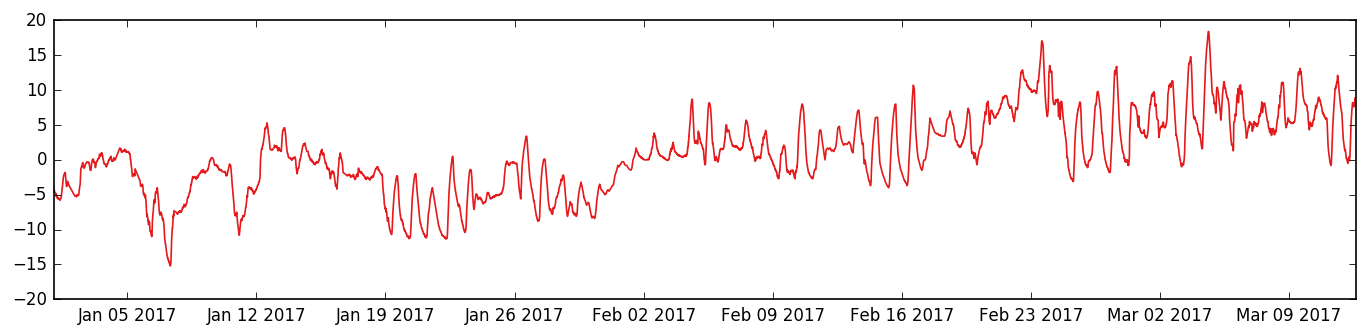

In [27]:
plt.figure(figsize=(14,3))
plt.plot(result['date'],result['TemperatureC'],lw=1)
plt.show()

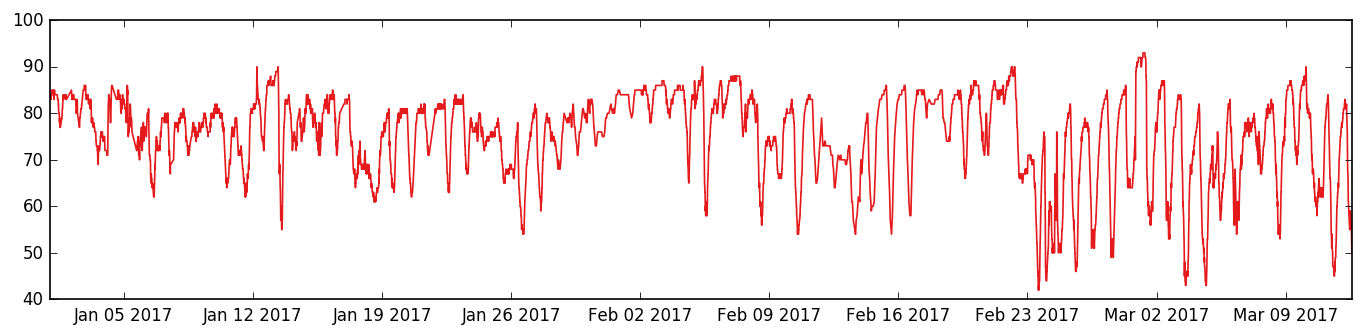

In [28]:
plt.figure(figsize=(14,3))
plt.plot(result['date'],result['Humidity'],lw=1)
plt.show()

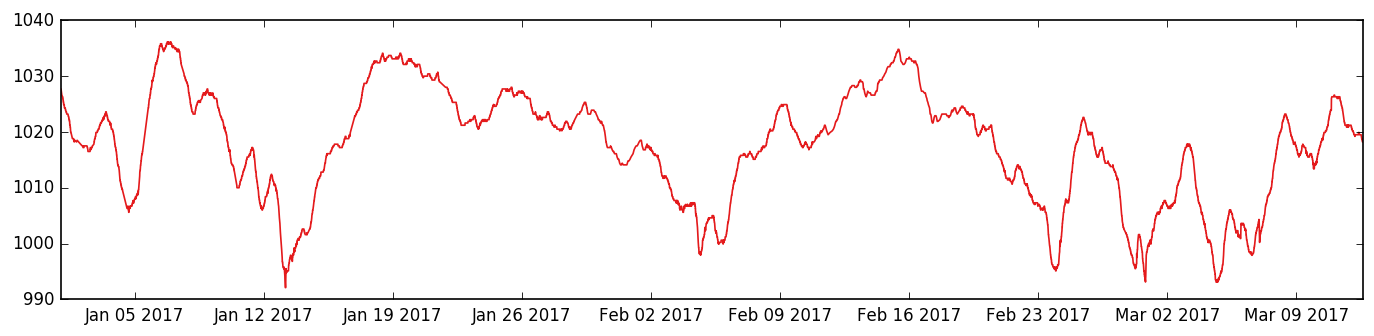

In [29]:
plt.figure(figsize=(14,3))
plt.plot(result['date'],result['PressurehPa'],lw=1)
plt.show()

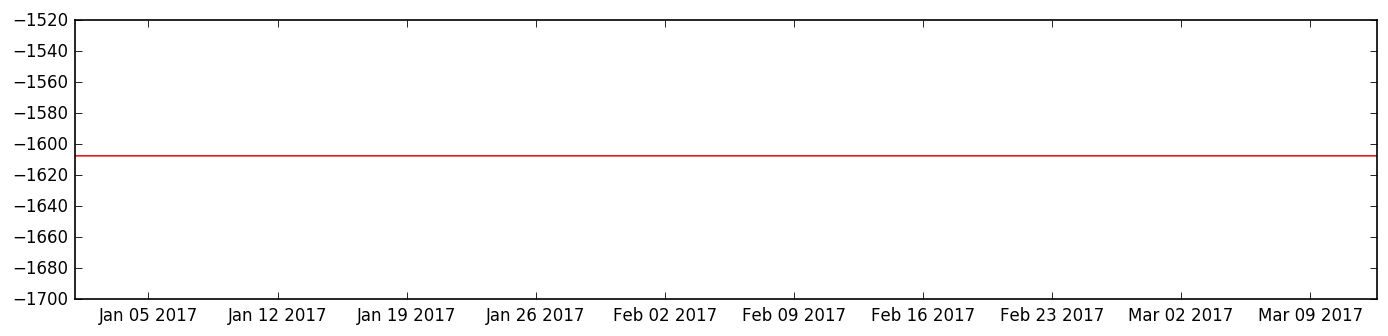

In [33]:
plt.figure(figsize=(14,3))
plt.plot(result['date'],result['WindSpeedGustKMH'],lw=1)
plt.show()